<a href="https://colab.research.google.com/github/Shyamsundarkanaka/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Data science/Module 1/Hotel booking analysis/'

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Data and going through it to undertand it


In [6]:
df = pd.read_csv(path+ 'Hotel Bookings.csv')

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.shape

(119390, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [11]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [12]:
print(df.columns[df.isna().any()].to_list)

<bound method IndexOpsMixin.tolist of Index(['children', 'country', 'agent', 'company'], dtype='object')>


In [13]:
df.columns[df.isna().any()]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [14]:
df[['children', 'country', 'agent', 'company']].isnull().sum(axis = 0)

children         4
country        488
agent        16340
company     112593
dtype: int64

In [15]:
'''
print(df.children.value_counts())
print(df.country.value_counts())
print(df.agent.value_counts())
print(df.company.value_counts())
'''


'\nprint(df.children.value_counts())\nprint(df.country.value_counts())\nprint(df.agent.value_counts())\nprint(df.company.value_counts())\n'

In [16]:
df.columns.to_list()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [17]:
print(df.children.value_counts())

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


#Data Cleansing

In [18]:
#Drop the company column as there too many missing values
df = df.drop(['company'], axis=1)

In [19]:
df.shape

(119390, 31)

In [20]:
# Replace Null Values with Mode for childen column
df['children'].fillna(df.children.mode()[0], inplace=True)

In [21]:
df['children'].isnull().sum()

0

In [22]:
df.columns[df.isna().any()]

Index(['country', 'agent'], dtype='object')

In [23]:
# Replace Null Values with Mode for country column
df.country.fillna(df.country.mode()[0], inplace=True)

In [24]:
df.columns[df.isna().any()]

Index(['agent'], dtype='object')

In [25]:
df.agent.value_counts().sort_values()


337.0        1
90.0         1
285.0        1
497.0        1
397.0        1
         ...  
7.0       3539
14.0      3640
1.0       7191
240.0    13922
9.0      31961
Name: agent, Length: 333, dtype: int64

In [26]:
#Replace Null value of agent column with  0
df.agent.fillna(0, inplace=True)

In [27]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [28]:
df.head(2
        )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


#Exploration

In [29]:
import datetime

In [30]:
df['date'] = df.apply(lambda row: datetime.datetime.strptime(str(row['arrival_date_year'])+'-'+row['arrival_date_month']+'-'+str(row['arrival_date_day_of_month']), '%Y-%B-%d'),axis=1)

75166
44224
              counts  percentage
Not_canceled   75166       62.96
canceled       44224       37.04


<BarContainer object of 2 artists>

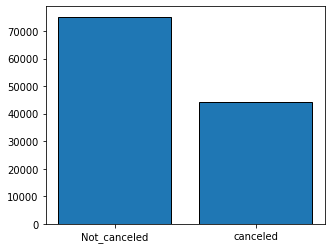

In [32]:
df_0 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts'])
#print(df2)
def percentage(val):
  print(val)
  return round((val*100)/df_0['counts'].sum(),2)

df_0['percentage'] = df_0.apply(lambda x: percentage(x[1]),axis=1 )
df_0 = df_0.drop('values',axis=1)
print(df_0)
plt.figure(figsize=(5,4)) # does not affect the following plot
plt.bar(list(df_0.index),list(df_0['counts']),0.8,ec='black')



,index,values,counts
0,Not_canceled,0,75166
1,canceled,1,44224


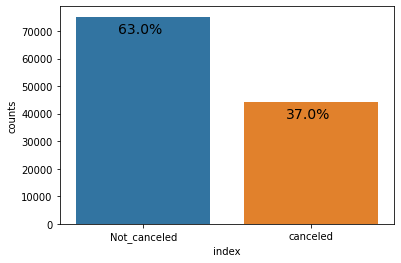

In [35]:
df_0 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts']).reset_index()
df_0
counts = df_0.counts.to_list()
def percent(x):
  return round(100*(x/sum(counts)),1)
sns.barplot(x='index',y='counts',data=df_0)
for i in range(0,2):
  plt.text(i-0.15,counts[i]-6000,str(percent(counts[i]))+'%',fontsize=14)
df_0

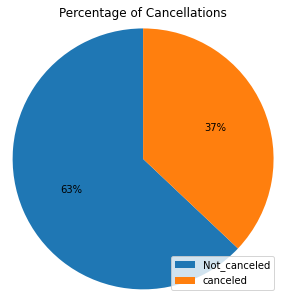

In [36]:
plt.figure(figsize=(5,5))
plt.pie(df_0.counts,radius=1.2,autopct='%1.0f%%',startangle=90,labeldistance=0.28)#labels = df2['index'],
plt.title('Percentage of Cancellations')
plt.legend(labels=df_0['index'],loc='lower right')

plt.show()

###We noticed that 37% of the total bookings got canceled.

## 1.Type of hotel

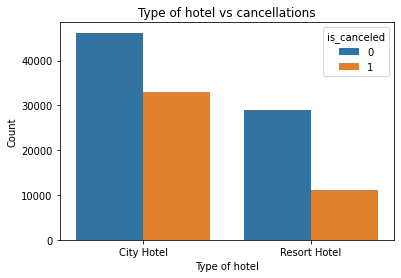

In [57]:
df_1 = pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
df_1 = df_1.rename(columns={"is_canceled": "count"})
df_1 = df_1.reset_index()
df_1
sns.barplot(x='hotel',y='count',hue='is_canceled',data=df_1)
plt.title('Type of hotel vs cancellations')
plt.xlabel('Type of hotel')
plt.ylabel('Count')
plt.show()

In [58]:
df_11 = pd.DataFrame(df.groupby('hotel')['is_canceled'].mean()*100)
df_11

,is_canceled
hotel,
City Hotel,41.726963
Resort Hotel,27.763355


### We noticed that city hotels had higher rate of cancellations of 42% and resort hotels has a lower rate of cancellations of 28%

We can conclude that people book city hotels more and also tend to cancel it easily, and people book resort hotels less but once book they do not cancel it easily.

##2.How does customer type effect cancellations?


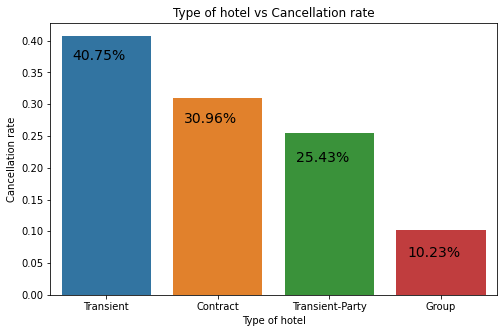

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(y='is_canceled',x='customer_type', data=df, ci=None)#, hue='is_canceled')
percentage = df.groupby('customer_type')['is_canceled'].mean().to_list()
percentage = sorted(percentage,reverse=True)
for i in range(0,4):
  plt.text(i-0.3,round(percentage[i],2)-0.04,str(round(percentage[i]*100,2))+'%',fontsize=14)
plt.title('Type of hotel vs Cancellation rate', loc='center')
plt.xlabel('Type of hotel')
plt.ylabel('Cancellation rate')

plt.show()

In [60]:
df_2 = pd.DataFrame(df.groupby('customer_type')['is_canceled'].value_counts())
df_2 = df_2.rename(columns={"is_canceled": "count"})
df_2 = df_2.reset_index()


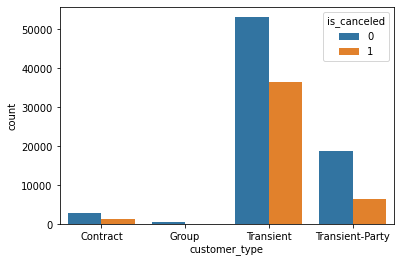

In [61]:
sns.barplot(x='customer_type',y='count',hue='is_canceled',data=df_2)


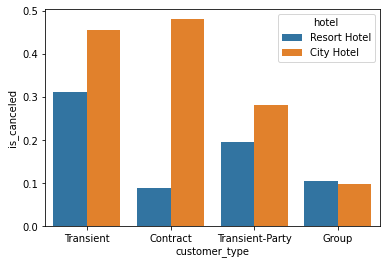

In [62]:
sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)
#sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)

### Transient type customers have highest cancellation rate and group customers have least cancellation rate.

Here we noticed a similar trend as in type of hotel. Transient type customers booked rooms more but also canceled more, and grouped customers are less and they are more likely to stay in the hotel once booked. 

##3.Variation of tendancy to cancellation over the months of the year.

In [85]:
def compliment(a):
  if a == 0:
    return 1
  else :
    return 0
df['is_not_canceled'] = df.is_canceled.apply(lambda x: compliment(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


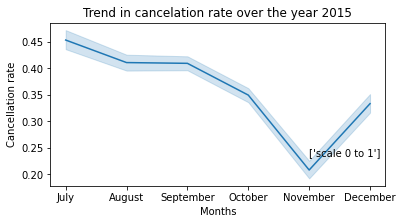

In [125]:
df_31 = df[df.arrival_date_year == 2015]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(6,3))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2015')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


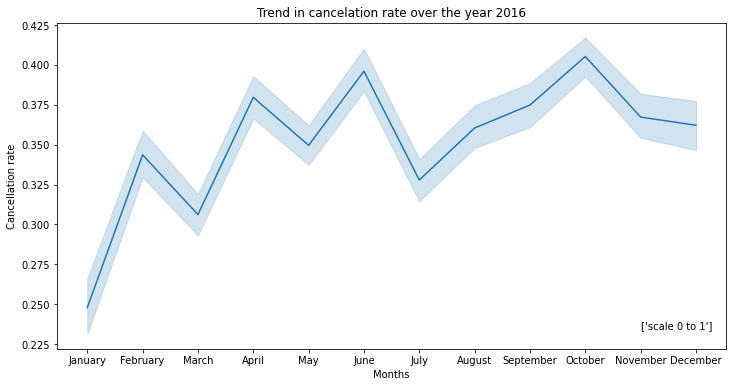

In [127]:
df_31 = df[df.arrival_date_year == 2016]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(12,6))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2016')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


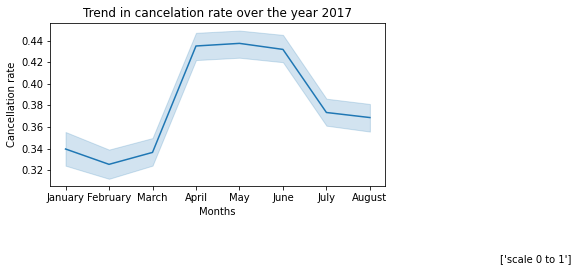

In [126]:
df_31 = df[df.arrival_date_year == 2017]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(6,3))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2017')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

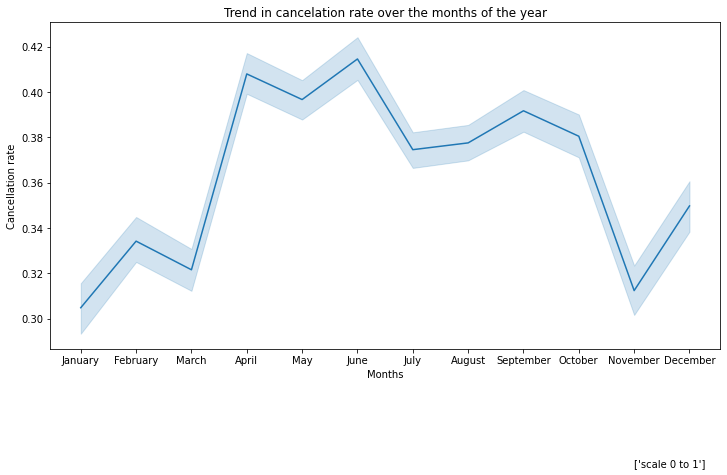

In [223]:
df_31 = df
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(12,6))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the months of the year')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

### (Check with the team) 

## 4.Does the change no of booking changes affect the cancellation?

In [190]:
df.booking_changes.value_counts()[:10]

0    101314
1     12701
2      3805
3       927
4       376
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64

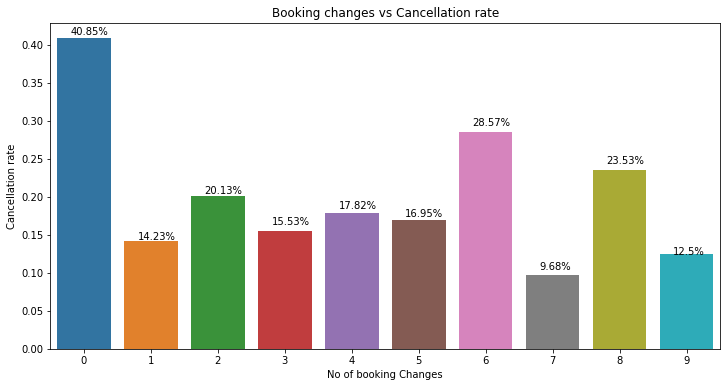

In [222]:
plt.figure(figsize=(12,6))

sns.barplot(x='booking_changes',y='is_canceled',data=df,order=pd.value_counts(df['booking_changes']).iloc[:10].index, ci=None)
percentage = df.groupby('booking_changes')['is_canceled'].mean().to_list()
for i in range(0,10):
  plt.text(i-0.2,round(percentage[i],2)+0.004,str(round(percentage[i]*100,2))+'%',fontsize=10)
plt.title('Booking changes vs Cancellation rate')
plt.xlabel('No of booking Changes')
plt.ylabel('Cancellation rate')
plt.show()

### We can notice that the cancellation rate was lower when the customers were allowed for changes

Being liberal on allowing customers to change thier bookings can help in reducing the cancellation rate. However it is better to limit is to 5. 

##5.If the assigned room is not same as reserved room?

In [172]:
df['same_room_assigned'] = np.where(df.reserved_room_type==df.assigned_room_type, 1 , 0)
#df['col3'] = np.where(df['age'] <= 9, 'child', df['sex'])


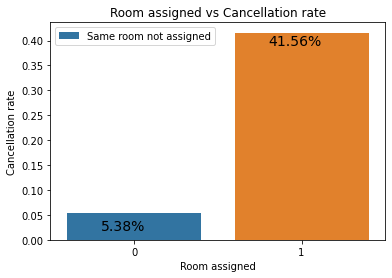

In [189]:
sns.barplot(x='', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('same_room_assigned')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.2,round(percentage[i],2)-0.03,str(round(percentage[i]*100,2))+'%',fontsize=14)
plt.title('Room assigned vs Cancellation rate')
plt.xlabel('Room assigned')
plt.ylabel('Cancellation rate')
plt.legend(['Same room not assigned'])
plt.show()


### We noticed that when same room was not assigned, the cancellation rate was very low.It implies Assigning a better room drastically reduce the cancellation rate. 

## 6.Cancellation rate based on deposit type 

In [169]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

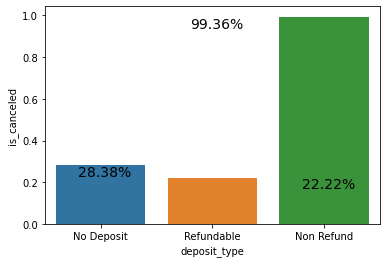

In [170]:
sns.barplot(x='deposit_type', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('deposit_type')['is_canceled'].mean().to_list()
for i in range(0,3):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)

### Not Insights

In [171]:
df.groupby('deposit_type')['is_canceled'].value_counts()


deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

## 7.Variation in of cancellation based on market segment.

In [156]:
#df_7 = df[df.market_segment!='Undefined']
df_7 = df.drop(df.loc[df['market_segment']=='Undefined'].index,)
print(df.shape,df_7.shape)

(119390, 33) (119388, 33)


In [157]:
market_segment_df = df_7['market_segment'].value_counts().reset_index().rename(columns={'index':'market_segment', 'market_segment': 'count'})
market_segment_df = market_segment_df.head(7)
market_segment_df

,market_segment,count
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237


In [158]:
# extracting number of customer type
market_segment_values = market_segment_df['count'].values
market_segment_values

array([56477, 24219, 19811, 12606,  5295,   743,   237])

In [159]:
# extracting customer type for labelling 
market_segment_labels = market_segment_df['market_segment'].values
market_segment_labels

array(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate',
       'Complementary', 'Aviation'], dtype=object)

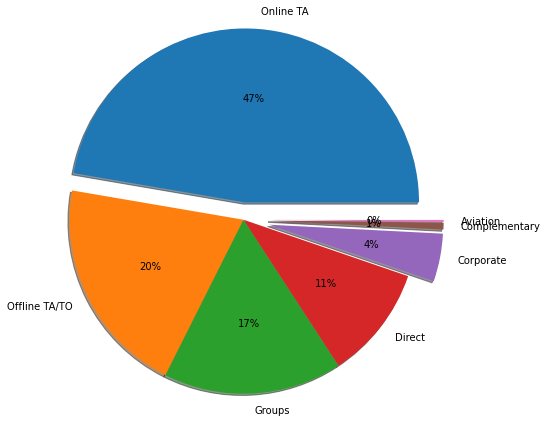

In [160]:
#Ploting pie plot
myexplode = [0.2, 0, 0, 0,0.3,0.3,0.3]
plt.pie(market_segment_values, labels = market_segment_labels,radius = 2,autopct='%1.0f%%', explode=myexplode, shadow = True)
plt.show() 

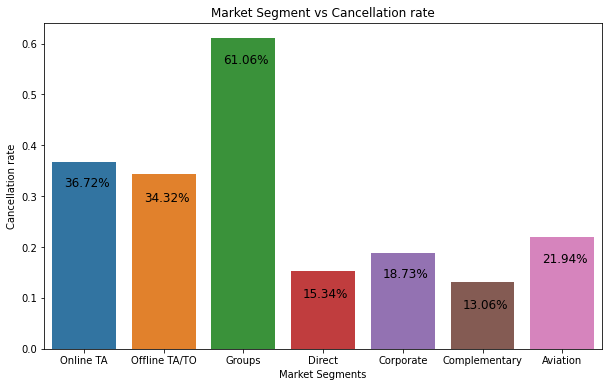

In [168]:
List = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate','Complementary', 'Aviation']
df['market_segment'] = pd.Categorical(df['market_segment'], categories=List, ordered=True)
plt.figure(figsize=(10,6))
sns.barplot(x='market_segment', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('market_segment')['is_canceled'].mean().to_list()
for i in range(0,7):
  plt.text(i-0.25,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=12)

plt.title('Market Segment vs Cancellation rate')
plt.xlabel('Market Segments')
plt.ylabel('Cancellation rate')
plt.show()


### The customers who come from grouped market segments have a very high cancellation rate and direct and complimentary customers had the least cancellation rate. 

## 8.How often does the repeated guest cancel the booking

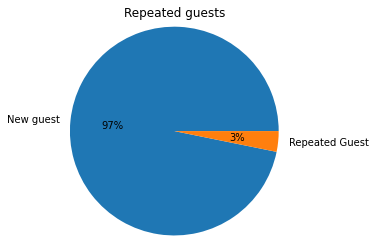

In [148]:

is_repeated = df.is_repeated_guest.value_counts().tolist()
plt.pie(is_repeated, labels=['New guest','Repeated Guest'], radius=1.2, autopct='%1.0f%%')
plt.title('Repeated guests')
plt.show()

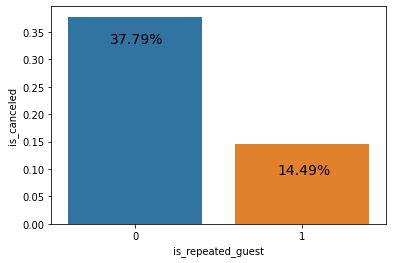

In [153]:
sns.barplot(x='is_repeated_guest', y = 'is_canceled', data=df, ci=None)

percentage = df.groupby('is_repeated_guest')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.15,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)
#sns.set_xticklabel(['New guest','Repeated Guest'])
plt.show()

### The number of repeated guests are low, but the repeated guests have a very low rate of cancelations. 

Coming up with a stragies to change a new customer into retuning customer is one of the key ways to reduce the cancellation rate. 

## 9.Does special request decrease the cancellation rate?

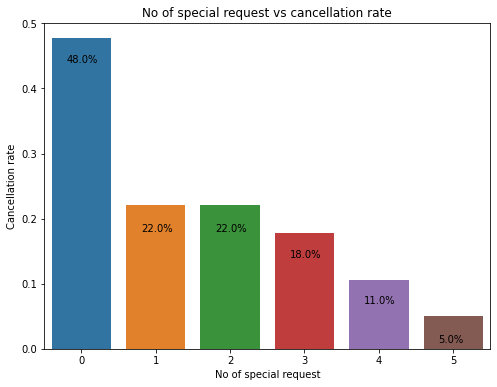

In [141]:
plt.figure(figsize=(8,6))
sns.barplot(x='total_of_special_requests', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('total_of_special_requests')['is_canceled'].mean().to_list()
for i in range(0,6):
  plt.text(i-0.2,round(percentage[i],2)-0.04,str(round(percentage[i],2)*100)+'%',fontsize=10)
plt.title('No of special request vs cancellation rate')
plt.xlabel('No of special request')
plt.ylabel('Cancellation rate')
plt.show()


### We notice that the cancellation rates are much lower if there are special requests. 

We should have encouraging pricing for special requests, that can help in reduction of cancellations.

## 10.Which type of meal type bookings have highest number of bookings.

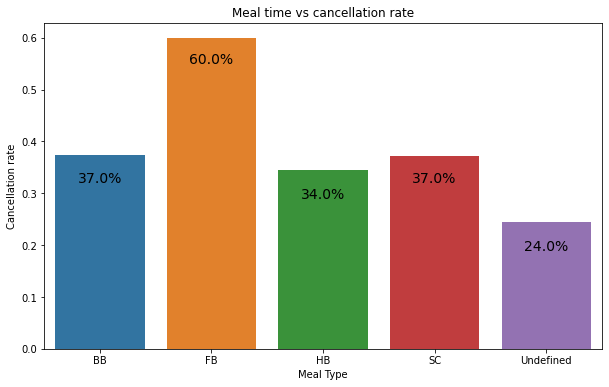

In [134]:
plt.figure(figsize=(10,6))
sns.barplot(x='meal', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('meal')['is_canceled'].mean().to_list()
for i in range(0,5):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i],2)*100)+'%',fontsize=14)
plt.title('Meal time vs cancellation rate')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation rate')
#plt.legend(['Bed & Breakfast',' Full Board','Half Board','SC','Unknown'])
plt.show()

### We noticed that Full board bookings had the hight rate of cancellations and other meal type showed a simliar rate. 